In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('df_for_LSTM.csv')
df = df.drop(['Unnamed: 0','index'], axis=1)
df.columns = ['tweets','sentiment']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['sentiment'], test_size=0.20, random_state=42)

In [7]:
#EMBEDDING
import gensim.downloader as api

In [8]:
word2vec_model = api.load('glove-twitter-200')

In [9]:
#NEW X_TRAIN

#Creo il corpus
vec = []
for phrase in X_train:
    vec.append(phrase)

#Creo lista contente tanti dizionari quanti tweets, ogni dizionario possiede come chiave la parola e come valore associato il vettore
word2vec = []
for phrase in vec:
    temp = {}
    for word in phrase.split():
        try:
            temp[word] = (word2vec_model[word])
        except Exception:
            pass
    word2vec.append(temp)
    
#Procedimento per fare la media dei vettori di ogni tweet e formare il nuovo X_train
i = 0
new_X_train = []
for phrase in X_train:
    tokens = word_tokenize(phrase)
    temp = np.array([0.0 for i in range(200)])
    for word in tokens:
        if word in word2vec[i].keys():
            matrix = word2vec[i][word]
            temp += matrix
    new_X_train.append(temp)
    i += 1

In [10]:
#NEW X_TEST

#Creo il corpus
vec = []
for phrase in X_test:
    vec.append(phrase)

#Creo lista contente tanti dizionari quanti tweets, ogni dizionario possiede come chiave la parola e come valore associato il vettore
word2vec = []
for phrase in vec:
    temp = {}
    for word in phrase.split():
        try:
            temp[word] = (word2vec_model[word])
        except Exception:
            pass
    word2vec.append(temp)
    
#Procedimento per fare la media dei vettori di ogni tweet e formare il nuovo X_train
i = 0
new_X_test = []
for phrase in X_test:
    tokens = word_tokenize(phrase)
    temp = np.array([0.0 for i in range(200)])
    for word in tokens:
        if word in word2vec[i].keys():
            matrix = word2vec[i][word]
            temp += matrix
    new_X_test.append(temp)
    i += 1

In [11]:
X_train = np.array(new_X_train)
X_test = np.array(new_X_test)

In [12]:
#Increase the dimension of X_train and X_test
X_train = np.expand_dims(X_train, 1)
X_test = np.expand_dims(X_test, 1)

In [13]:
#Encoding y_train and y_test
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [14]:
#Reshaping
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [15]:
#Create a new y train with two value for each row (0, 1) for negative sentiment and (1, 0) for positive sentiment
new_y_train = np.array([])
for i in range(len(y_train)):
    if y_train[i] == 0:
        new_y_train = np.append(new_y_train, np.array([0,1]))
    else:
        new_y_train = np.append(new_y_train, np.array([1,0]))

In [16]:
#Create a new y test with two value for each row (0, 1) for negative sentiment and (1, 0) for positive sentiment
new_y_test = np.array([])
for i in range(len(y_test)):
    if y_test[i] == 0:
        new_y_test = np.append(new_y_test, np.array([0,1]))
    else:
        new_y_test = np.append(new_y_test, np.array([1,0]))

In [17]:
#Reshaping
y_test = new_y_test.reshape(-1,2)
y_train = new_y_train.reshape(-1,2)

In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(168573, 1, 200) (168573, 2)
(42144, 1, 200) (42144, 2)


In [19]:
model = Sequential()
model.add(LSTM(200, dropout=0.2, return_sequences=False, input_shape=(X_train.shape[1:])))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 128)               25728     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 356,930
Trainable params: 356,930
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32 , validation_data=(X_test, y_test))

Epoch 1/30
5268/5268 [==============================] - 23s 4ms/step - loss: 0.4256 - accuracy: 0.7968 - val_loss: 0.3760 - val_accuracy: 0.8285
Epoch 2/30
5268/5268 [==============================] - 24s 4ms/step - loss: 0.3935 - accuracy: 0.8152 - val_loss: 0.3585 - val_accuracy: 0.8392
Epoch 3/30
5268/5268 [==============================] - 23s 4ms/step - loss: 0.3809 - accuracy: 0.8225 - val_loss: 0.3526 - val_accuracy: 0.8385
Epoch 4/30
5268/5268 [==============================] - 23s 4ms/step - loss: 0.3726 - accuracy: 0.8256 - val_loss: 0.3445 - val_accuracy: 0.8445
Epoch 5/30
5268/5268 [==============================] - 23s 4ms/step - loss: 0.3662 - accuracy: 0.8300 - val_loss: 0.3416 - val_accuracy: 0.8433
Epoch 6/30
5268/5268 [==============================] - 23s 4ms/step - loss: 0.3611 - accuracy: 0.8323 - val_loss: 0.3429 - val_accuracy: 0.8436
Epoch 7/30
5268/5268 [==============================] - 24s 4ms/step - loss: 0.3582 - accuracy: 0.8352 - val_loss: 0.3416 - val_ac

In [22]:
#Compute the prediction in order to calculate the confusion matrix and the classification report
prediction = model.predict(X_test)

In [23]:
#Fix the prediction
correct_pred = []
for pred in prediction:
    if pred[0] < 0.5:
        correct_pred.append(0.0)
    else:
        correct_pred.append(1.0)

correct_pred = np.array(correct_pred)
correct_pred = correct_pred.reshape(-1,1)

In [24]:
cm = confusion_matrix(y_test[:,0], correct_pred)
cr = classification_report(y_test[:,0], correct_pred)

In [25]:
print('CONFUSION MATRIX: \n')
print('True Positive:', cm[0][0], 'False Positive:', cm[0][1], '\n'
      'False Negative:', cm[1][0], 'True Negative:', cm[1][1])

CONFUSION MATRIX: 

True Positive: 13950 False Positive: 3088 
False Negative: 3327 True Negative: 21779


In [26]:
print('CLASSIFICATION REPORT: \n')
print(cr)

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81     17038
         1.0       0.88      0.87      0.87     25106

    accuracy                           0.85     42144
   macro avg       0.84      0.84      0.84     42144
weighted avg       0.85      0.85      0.85     42144



In [27]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


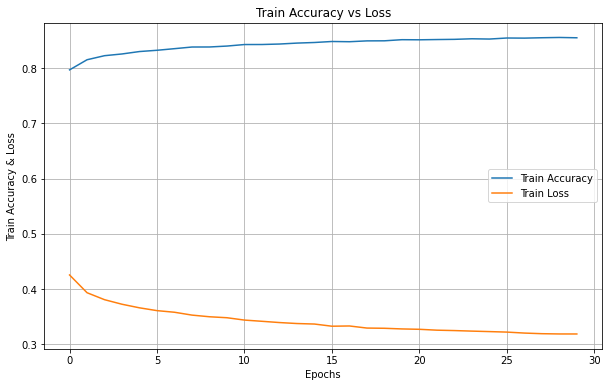

In [28]:
plt.figure(figsize=(10,6))
plt.title('Train Accuracy vs Loss')
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('Train Accuracy & Loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend(['Train Accuracy', 'Train Loss'], loc='center right')

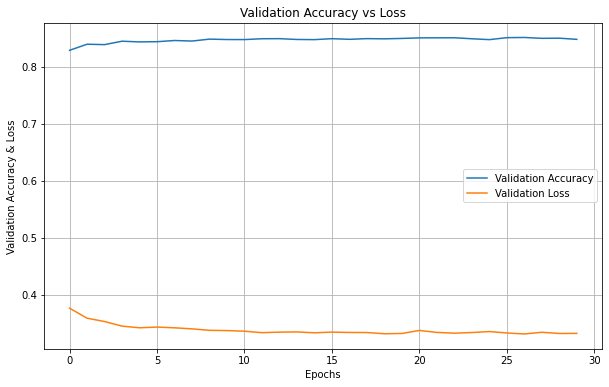

In [29]:
plt.figure(figsize=(10,6))
plt.title('Validation Accuracy vs Loss')
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.ylabel('Validation Accuracy & Loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend(['Validation Accuracy', 'Validation Loss'], loc='center right')